# Project: Wake Up! - Fullstack final project #

## Model conception : Eyes classifications (Open/closed) with CNN ##

### Some explanations :
This is an exploratory notebook to find the best model for predicting the Open/Closed state of an eye.

#### Several Datasets have been tested
https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset : This dataset contains photos of eyes and mouths. Only photos of eyes were used. It is from this dataset that the best results have been obtained, by converting the images initially in color into shades of gray.  
NB: the file has been renamed to: dataset_eyes_color.zip

http://mrl.cs.vsb.cz/eyedataset : A dataset of 85,000 grayscale images. A priori, seemed interesting because there were 37 subjects with photos taken in different contexts (glasses, brightness, etc.). The results are not good: overfiting. On closer inspection, the images are too similar.

https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset : Une version réduite du dataset ci dessus à 4000 images et équilibré. Les résultats sont identiques : overfiting.

#### Models
Several layer configurations of the CNN neural network were tested:
- the 0 models are taken directly from the course, 
- the other models are taken from the literature.
The model that gave the best results is model 2.

#### Training
To make the code easier to read, especially with MlFlow, the training of the models has been put in the fit_with_mlflow() function.
However, for performance reasons, the line is sometimes commented out in the code below in favor of the traditional fit() call.

## Librairies

In [ ]:
# importation des librairies
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
!pip install mlflow
import mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=48da0c75c680c4c70f9058c351790ed54e6f77ffbd2d3970fc7880365dd436f4
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
os.environ["AWS_ACCESS_KEY_ID"] = ""
os.environ["AWS_SECRET_ACCESS_KEY"] = ""

def fit_with_mlflow(version, epochs = 20):
  # Set your variables for your environment
  EXPERIMENT_NAME = "eyes_classification_CNN_gray"

  os.environ["APP_URI"] = "https://wakeup-mlflow-c837e965677f.herokuapp.com/"

  # Set model name
  MODEL_NAME = EXPERIMENT_NAME + "_model_" + str(version)

  # Set tracking URI to your Heroku application
  mlflow.set_tracking_uri(os.environ["APP_URI"])

  # Set experiment's info
  mlflow.set_experiment(EXPERIMENT_NAME)

  # Get our experiment info
  experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

  # Call mlflow autolog
  mlflow.tensorflow.autolog()

  with mlflow.start_run(experiment_id = experiment.experiment_id):

      # Instanciate and fit the model
      model.fit(img_generator_flow_train, validation_data = img_generator_flow_valid, epochs=epochs)

      mlflow.tensorflow.log_model(model=model,
                                  artifact_path = "eyes_classification_CNN_gray",
                                  registered_model_name = MODEL_NAME)

## Downloading Datasets (images)

In [ ]:
# téléchargement de l'archive avec les photos
"""
import pathlib
data_root_orig = tf.keras.utils.get_file(origin = 'http://supertibo.com/datasets/eyes.zip',
                                         fname = '/data/eyes.zip',
                                         cache_subdir = "/data")
"""

In [ ]:
# dezip du dataset de train
# importing shutil module
import shutil

# Full path of
# the archive file
filename = "/data/dataset_eyes_color.zip"

# Target directory
extract_dir = "/data"

# Format of archie file
archive_format = "zip"

# Unpack the archive file
shutil.unpack_archive(filename, extract_dir, archive_format)
print("Archive file unpacked successfully.")


Archive file unpacked successfully.


In [ ]:
# dezip du dataset de verification (predict)
# importing shutil module
import shutil

# Full path of
# the archive file
filename = "/data/zyeux.zip"

# Target directory
extract_dir = "/data"

# Format of archie file
archive_format = "zip"

# Unpack the archive file
shutil.unpack_archive(filename, extract_dir, archive_format)
print("Archive file unpacked successfully.")

Archive file unpacked successfully.


In [ ]:
import pathlib
data_root = pathlib.Path("/data/train")

for item in data_root.iterdir():
  print(item)

/content/train/Closed
/content/train/Open


In [ ]:
# suppression des 2 dossiers avec les bouches le cas échéant
!rm -r /content/train/yawn
!rm -r /content/train/no_yawn

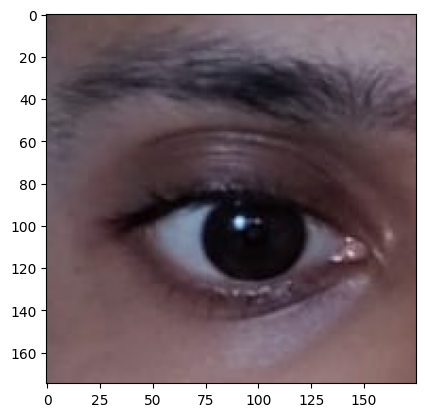

In [ ]:
# visualsiation de quelques images ici directement à partir des fichiers, ou pas ?
import matplotlib.pyplot as plt
#plt.imshow(plt.imread(r"/content/train/Open_Eyes/s0001_02334_0_0_1_0_0_01.png"))
plt.imshow(plt.imread(r"/data/train/Open/_0.jpg"))


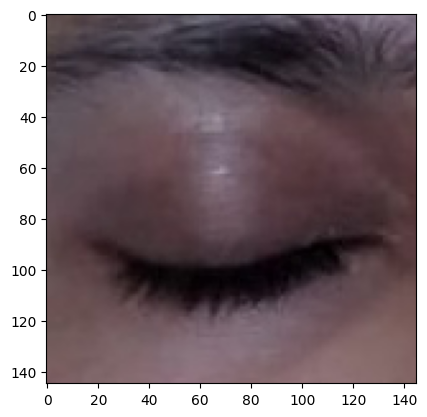

In [ ]:
#plt.imshow(plt.imread(r"/content/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png"))
plt.imshow(plt.imread(r"/data/train/Closed/_0.jpg"))

In [ ]:
# labels
class_labels = os.listdir(r"/data/train")
class_labels.sort()
print(class_labels)


['Closed', 'Open']


In [ ]:
# dimenions , mais je nce crois pas que ce soit toutes les meme !!!
#a = plt.imread(r"/content/train/Open_Eyes/s0001_02334_0_0_1_0_0_01.png")
a = plt.imread(r"/data/train/Open/_0.jpg")
a.shape

(175, 175, 3)

We will now create an ImageDataGenerator object in order to use data augmentation on our flower images.

In [ ]:
# ImageDataGenerator from Keras
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        horizontal_flip = True,
        vertical_flip = True,
        rescale = 1/255.,
        validation_split = 0.2
)

In [ ]:
# quid taille d'image : pas toutes la meme dans le dataset - issu de la littérature un resize à 52x52 semble un bon compromis 
# quid de color_mode : rgb ou gray_scale - gray_scale reduit un peu le temps d'entrainement et avec un meilleur score
# quid de class_mode : categorical par defaut
# quid de keep_target_ratio : par expérimenté au final.

img_generator_flow_train = img_generator.flow_from_directory(
    directory = "/data/train",
    target_size = (52, 52),
    color_mode = "grayscale",
    batch_size = 32,
    shuffle = True,
    subset = "training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory = "/data/train",
    target_size = (52, 52),
    color_mode = "grayscale",
    batch_size = 32,
    shuffle = True,
    subset = "validation")

Found 1162 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


Let's visualize a batch of images from the train set.

Label : Closed


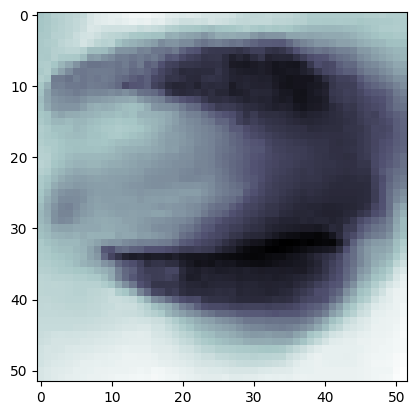

Label : Open


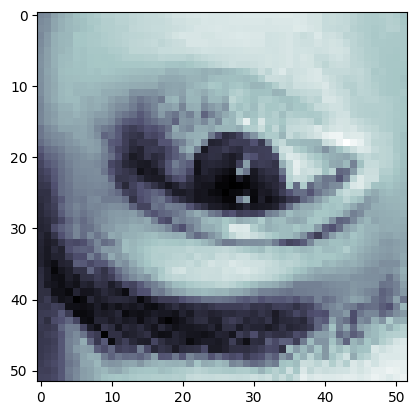

Label : Closed


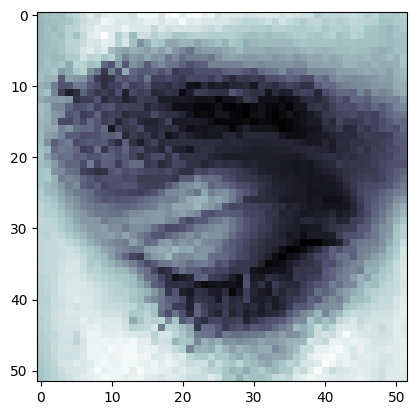

Label : Closed


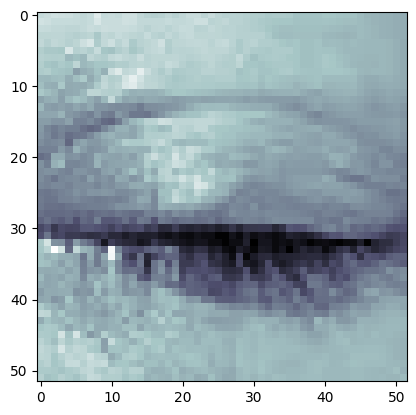

Label : Closed


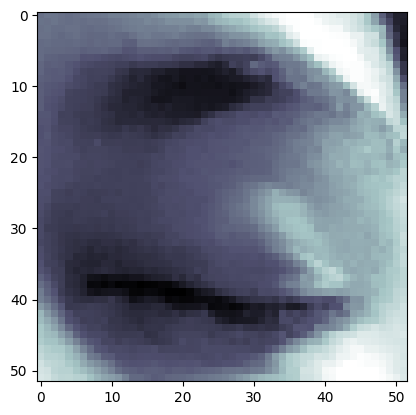

Label : Closed


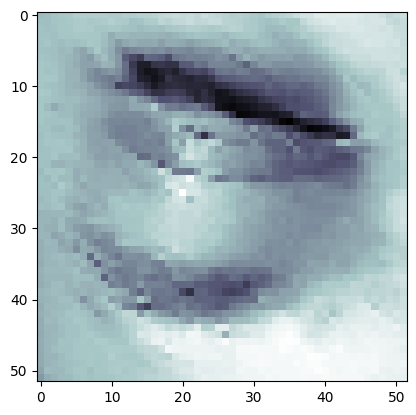

Label : Closed


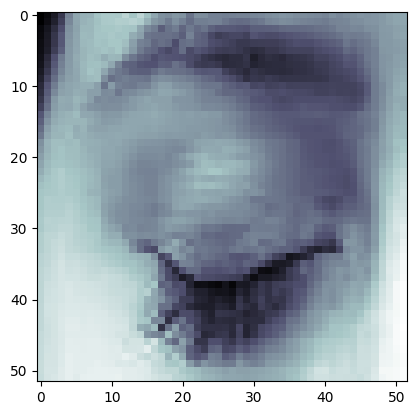

Label : Open


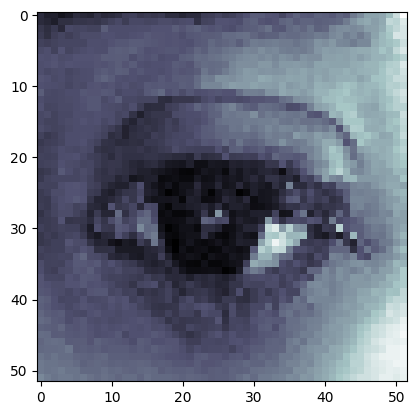

Label : Open


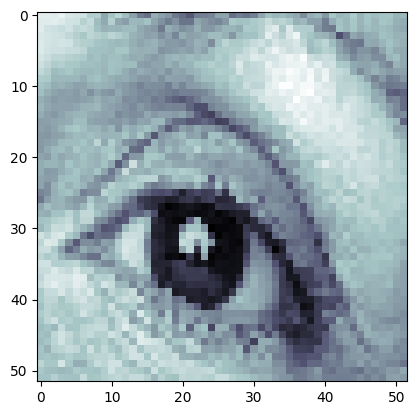

Label : Closed


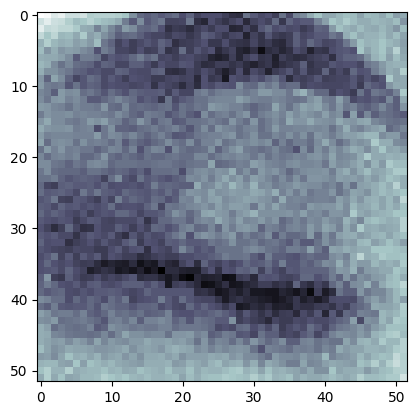

Label : Closed


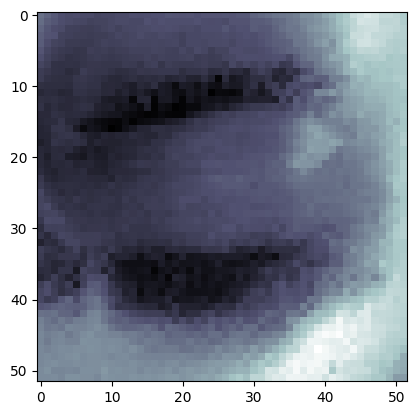

Label : Closed


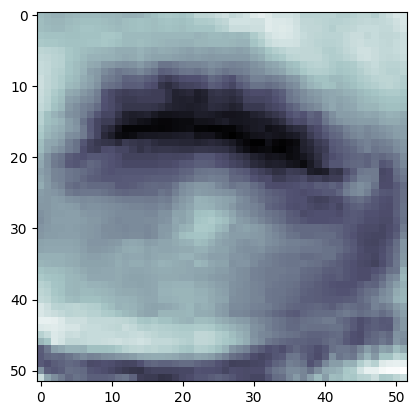

Label : Open


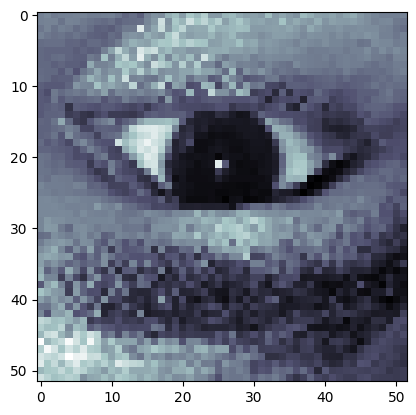

Label : Closed


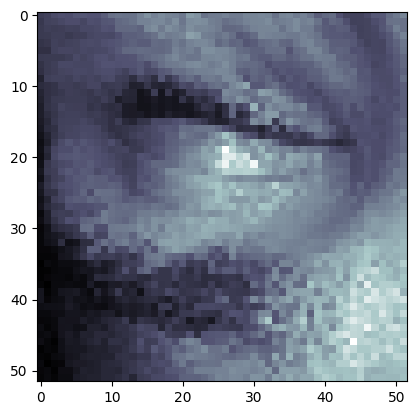

Label : Closed


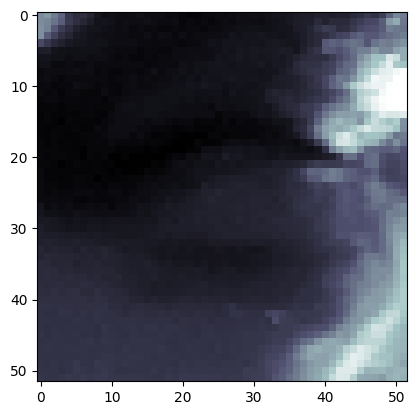

Label : Closed


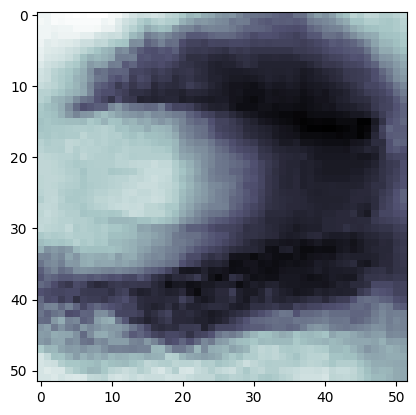

Label : Open


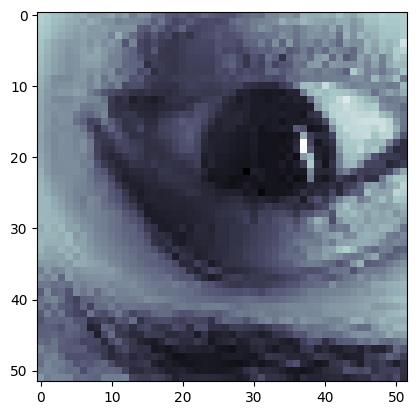

Label : Open


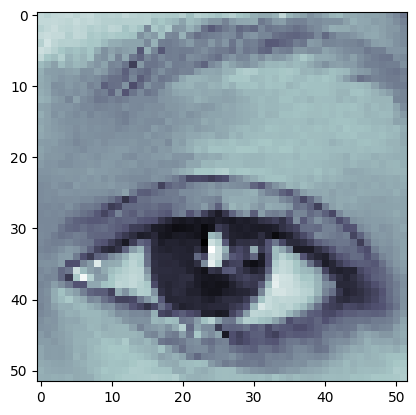

Label : Closed


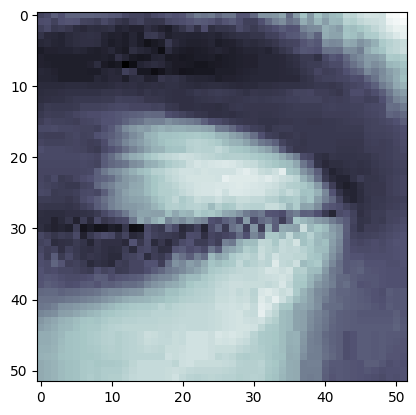

Label : Open


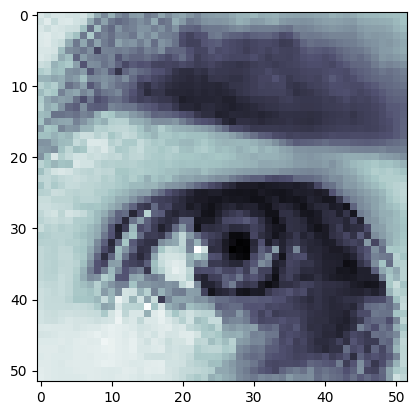

Label : Closed


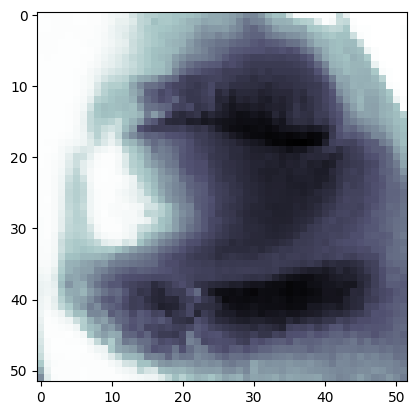

Label : Closed


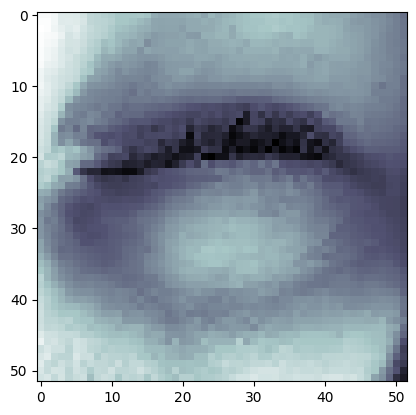

Label : Open


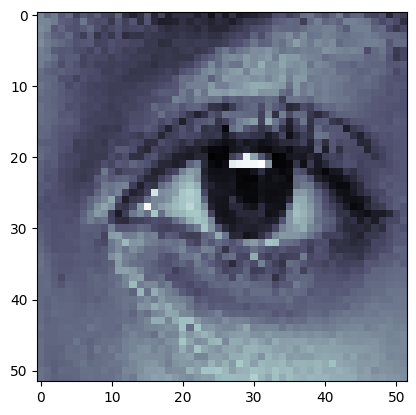

Label : Closed


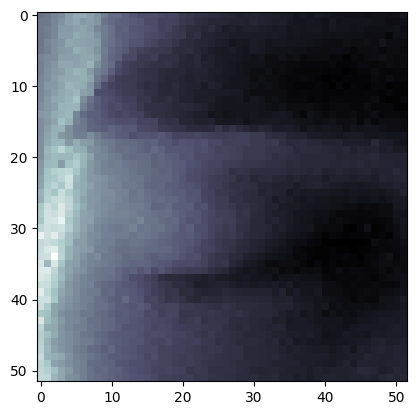

Label : Closed


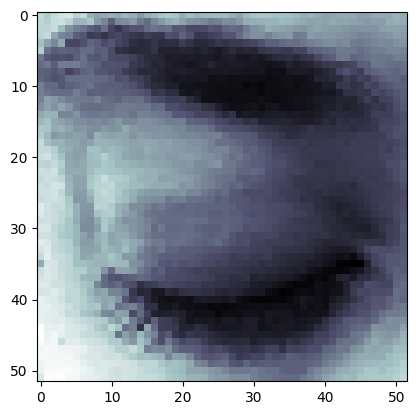

Label : Open


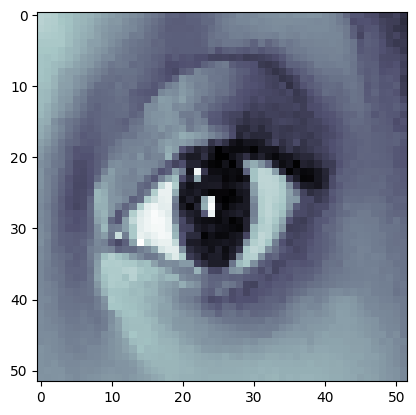

Label : Open


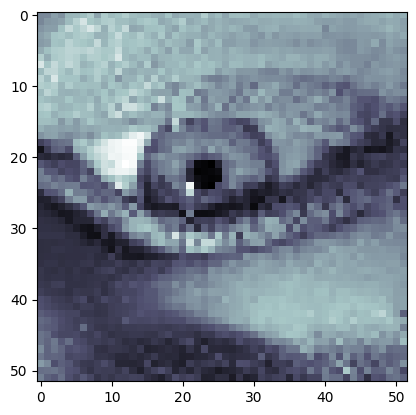

Label : Closed


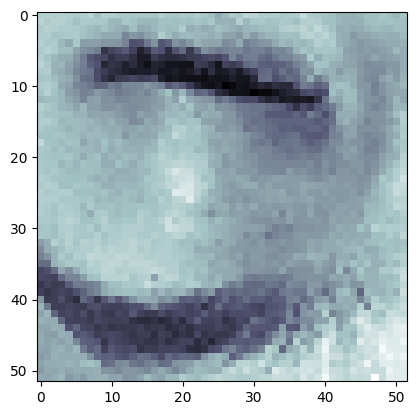

Label : Open


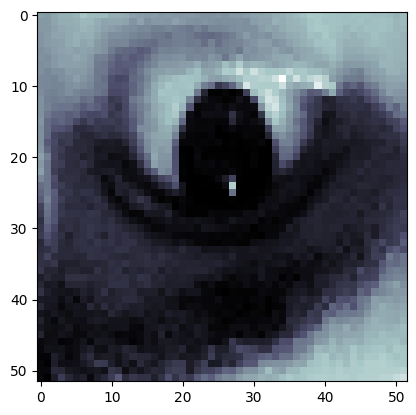

Label : Open


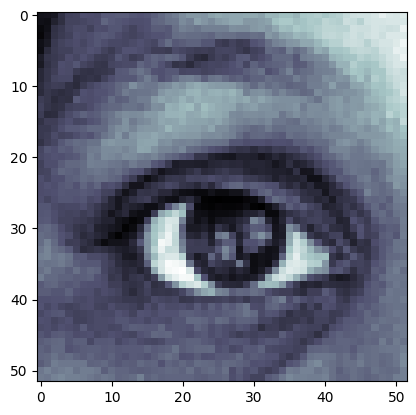

Label : Closed


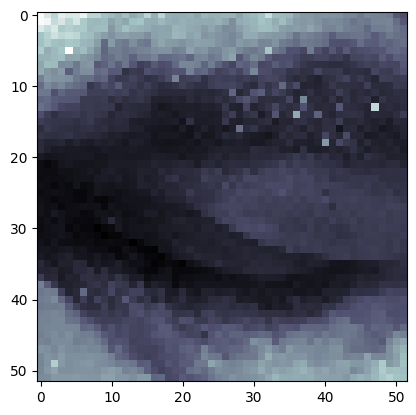

Label : Closed


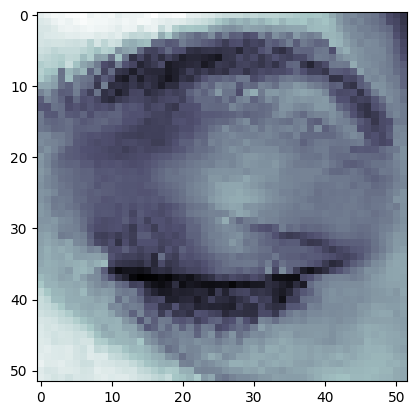

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
  true_file_path = np.argmax(img_generator_flow_train.labels == tf.argmax(label))
  true_label_name = Path(img_generator_flow_train.filepaths[true_file_path]).parent.name
  print("Label :", true_label_name)
  plt.imshow(img, cmap= "bone")
  plt.show()

We are now all set, and ready to embark on our deep learning journey!

## CNN

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers import Adam

from keras.models import load_model


# Model 0 (ceux du cours sur CNN)

In [ ]:
model = Sequential([
     Conv2D(32, (3,3), padding = "same", input_shape = (52,52,1)),
     MaxPool2D(),
     Flatten(),
     Dense(2, activation = "softmax")
    ])

In [ ]:
model = Sequential(
    [
     Conv2D(32, (3,3), padding = "same", input_shape = (52,52,1)),
     MaxPool2D(),
     Conv2D(64, (3,3), padding = "same"),
     MaxPool2D(),
     Flatten(),
     Dense(2, activation = "softmax")
    ]
)

In [ ]:
model = Sequential(
    [
     Conv2D(32, (3,3), padding = "same", input_shape = (52,52,1)),
     MaxPool2D(),
     Conv2D(64, (3,3), padding = "same"),
     MaxPool2D(),
     Conv2D(128, (3,3), padding = "same"),
     MaxPool2D(),
     Flatten(),
     Dense(2, activation = "softmax")
    ]
)

In [ ]:
model = Sequential(
    [
     Conv2D(64, (3,3), padding = "same", input_shape = (52,52,1)),
     MaxPool2D(),
     Conv2D(128, (3,3), padding = "same"),
     MaxPool2D(),
     Conv2D(256, (3,3), padding = "same"),
     MaxPool2D(),
     Flatten(),
     Dense(2, activation = "softmax")
    ]
)

In [ ]:
model = Sequential(
    [
     Conv2D(32, (3,3), padding = "same", input_shape = (52,52,1)),
     Conv2D(32, (3,3), padding = "same"),
     MaxPool2D(),
     Conv2D(64, (3,3), padding = "same"),
     Conv2D(64, (3,3), padding = "same"),
     MaxPool2D(),
     Conv2D(128, (3,3), padding = "same"),
     Conv2D(128, (3,3), padding = "same"),
     MaxPool2D(),
     Flatten(),
     Dense(2, activation = "softmax")
    ]
)

In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lr_schedule = 0.001 # valeur par defaut, mais au cas où

model.compile(optimizer = Adam(learning_rate = lr_schedule),
              loss = CategoricalCrossentropy(),
              metrics = [CategoricalAccuracy()])

#model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, epochs=20)
fit_with_mlflow(10, 20) # 0 pour gray, 10 pour color en gray

# sauvegarde/enregitrement du model
model.save('CNN_model_0_gray.h5', overwrite = True)

2023/06/16 12:26:03 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/06/16 12:26:03 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/20
37/37 [==============================] - 8s 145ms/step - loss: 0.5283 - categorical_accuracy: 0.7470 - val_loss: 0.3133 - val_categorical_accuracy: 0.8517
Epoch 2/20
37/37 [==============================] - 6s 151ms/step - loss: 0.2224 - categorical_accuracy: 0.9182 - val_loss: 0.2691 - val_categorical_accuracy: 0.8828
Epoch 3/20
37/37 [==============================] - 5s 127ms/step - loss: 0.1690 - categorical_accuracy: 0.9432 - val_loss: 0.2260 - val_categorical_accuracy: 0.9103
Epoch 4/20
37/37 [==============================] - 6s 159ms/step - loss: 0.1388 - categorical_accuracy: 0.9561 - val_loss: 0.2323 - val_categorical_accuracy: 0.9207
Epoch 5/20
37/37 [==============================] - 5s 128ms/step - loss: 0.1017 - categorical_accuracy: 0.9604 - val_loss: 0.2284 - val_categorical_accuracy: 0.9069
Epoch 6/20
37/37 [==============================] - 6s 170ms/step - loss: 0.1043 - categorical_accuracy: 0.9682 - val_loss: 0.2632 - val_categorical_accuracy: 0.9172
Epoc

2023/06/16 12:27:59 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/06/16 12:27:59 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/06/16 12:28:08 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.10+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.10' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/06/16 12:28:13 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.

In [ ]:
model.summary()

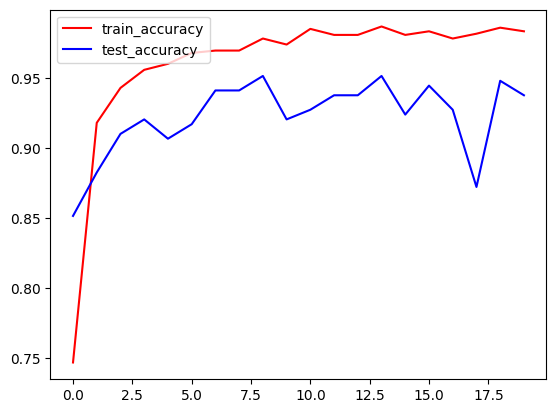

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c = "r", label = "train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c = "b", label = "test_accuracy")
plt.legend(loc = "upper left")
plt.show()

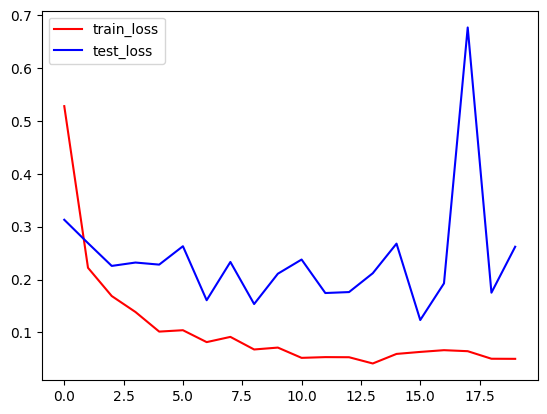

In [ ]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c = "r", label = "train_loss")
plt.plot(model.history.history["val_loss"], c = "b", label = "test_loss")
plt.legend(loc = "upper left")
plt.show()

# Model 1
https://github.com/vikasbhadoria69/drowsiness_detection_MachineLearning_ComputerVision/blob/master/model.py

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (52,52,1)),
    MaxPool2D(pool_size = (1,1)),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPool2D(pool_size = (1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (1,1)),
#64 convolution filters used each of size 3x3
#choose the best features via pooling

#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation = 'relu'),
#one more dropout for convergence' sake :)
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation = 'softmax')
])

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lr_schedule = 0.001 # valeur par defaut, mais au cas où

model.compile(optimizer = Adam(learning_rate = lr_schedule),
              loss = CategoricalCrossentropy(),
              metrics = [CategoricalAccuracy()])

#model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, epochs=20)
fit_with_mlflow(11, 20) # 1 pour gray, 11 pour color en gray

# sauvegarde/enregitrement du model
model.save('CNN_model_1_gray.h5', overwrite = True)

2023/06/16 12:29:52 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/06/16 12:29:52 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/20
37/37 [==============================] - 7s 146ms/step - loss: 0.5541 - categorical_accuracy: 0.7453 - val_loss: 0.3259 - val_categorical_accuracy: 0.8621
Epoch 2/20
37/37 [==============================] - 6s 163ms/step - loss: 0.2473 - categorical_accuracy: 0.8993 - val_loss: 0.3047 - val_categorical_accuracy: 0.8724
Epoch 3/20
37/37 [==============================] - 5s 132ms/step - loss: 0.2019 - categorical_accuracy: 0.9269 - val_loss: 0.2642 - val_categorical_accuracy: 0.8897
Epoch 4/20
37/37 [==============================] - 5s 144ms/step - loss: 0.1648 - categorical_accuracy: 0.9380 - val_loss: 0.2962 - val_categorical_accuracy: 0.8897
Epoch 5/20
37/37 [==============================] - 5s 147ms/step - loss: 0.1556 - categorical_accuracy: 0.9458 - val_loss: 0.2137 - val_categorical_accuracy: 0.9138
Epoch 6/20
37/37 [==============================] - 5s 134ms/step - loss: 0.1375 - categorical_accuracy: 0.9518 - val_loss: 0.2175 - val_categorical_accuracy: 0.9103
Epoc

2023/06/16 12:31:50 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/06/16 12:31:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/06/16 12:31:59 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.10+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.10' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/06/16 12:32:09 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.

In [ ]:
model.summary()

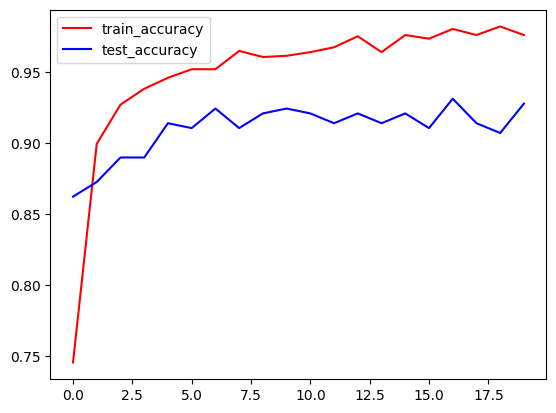

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c = "r", label = "train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c = "b", label = "test_accuracy")
plt.legend(loc = "upper left")
plt.show()

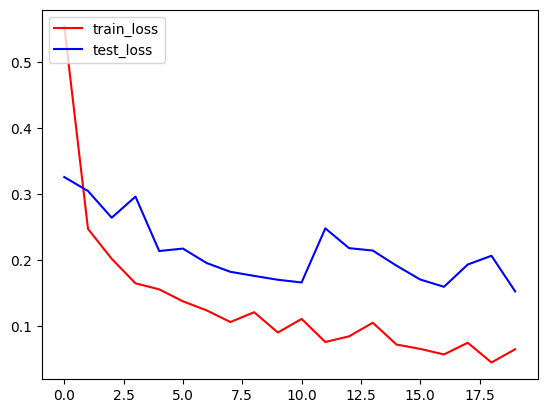

In [ ]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c = "r", label = "train_loss")
plt.plot(model.history.history["val_loss"], c = "b", label = "test_loss")
plt.legend(loc = "upper left")
plt.show()

# Model 2
https://github.com/satyamgeek/driver_drowsiness_system_CNN/blob/main/driver-drowsiness_notebook.ipynb

In [ ]:
model = Sequential([
  Conv2D(256, (3, 3), activation = "relu", input_shape = (52,52,1)),
  MaxPool2D(2, 2),
  Conv2D(128, (3, 3), activation = "relu"),
  MaxPool2D(2, 2),
  Conv2D(64, (3, 3), activation = "relu"),
  MaxPool2D(2, 2),
  Conv2D(32, (3, 3), activation = "relu"),
  MaxPool2D(2, 2),
  Flatten(),
  Dropout(0.5),
  Dense(64, activation = "relu"),
  Dense(2, activation = "softmax")
  ])

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lr_schedule = 0.001 # valeur par defaut, mais au cas où

model.compile(optimizer = Adam(learning_rate = lr_schedule),
              loss = CategoricalCrossentropy(),
              metrics = [CategoricalAccuracy()])

model.fit(img_generator_flow_train, validation_data = img_generator_flow_valid, epochs = 30)
#fit_with_mlflow(12, 30) # 2 pour gray, 12 pour color en gray

# sauvegarde/enregitrement du model
model.save('CNN_model_2_gray.h5', overwrite = True)

Epoch 1/30
37/37 [==============================] - 17s 171ms/step - loss: 0.6518 - categorical_accuracy: 0.6024 - val_loss: 0.5217 - val_categorical_accuracy: 0.7379
Epoch 2/30
37/37 [==============================] - 5s 138ms/step - loss: 0.4370 - categorical_accuracy: 0.8133 - val_loss: 0.6951 - val_categorical_accuracy: 0.7138
Epoch 3/30
37/37 [==============================] - 5s 137ms/step - loss: 0.3518 - categorical_accuracy: 0.8718 - val_loss: 0.4137 - val_categorical_accuracy: 0.8276
Epoch 4/30
37/37 [==============================] - 5s 124ms/step - loss: 0.2770 - categorical_accuracy: 0.8916 - val_loss: 0.3058 - val_categorical_accuracy: 0.8690
Epoch 5/30
37/37 [==============================] - 6s 154ms/step - loss: 0.2409 - categorical_accuracy: 0.9225 - val_loss: 0.2982 - val_categorical_accuracy: 0.8655
Epoch 6/30
37/37 [==============================] - 6s 162ms/step - loss: 0.2187 - categorical_accuracy: 0.9277 - val_loss: 0.2598 - val_categorical_accuracy: 0.8897
Epo

In [ ]:
model.summary()

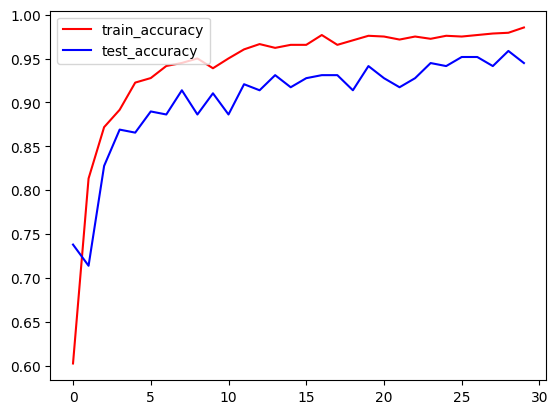

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c = "r", label = "train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c = "b", label = "test_accuracy")
plt.legend(loc = "upper left")
plt.show()

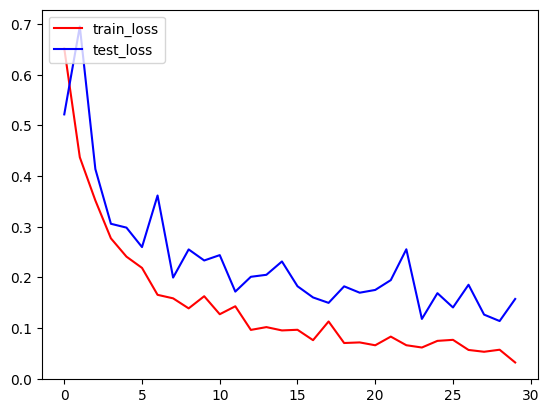

In [ ]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c = "r", label = "train_loss")
plt.plot(model.history.history["val_loss"], c = "b", label = "test_loss")
plt.legend(loc = "upper left")
plt.show()

#### A few words about the confusion matrix. 

Obviously, putting shuffle=True in flow_from_directory() is problematic for the mass predict!? (we find this problem in many questions on the forums)
The confusion matrix gives a result of 50%. (we see it in the cells below)  
A simple solution, certainly would have been, but has not been tested, to set shuffe=false for the purpose of the confusion matrix.  
Here, another solution was chosen: note the predictions batch after batch.  
However, a problem to iterate correctly on img_generator_flow_valid was encountered (infinite loop). The number of iterations was therefore defined manually.

In [ ]:
# Confution Matrix
from tensorflow.math import confusion_matrix

#Y_pred = model.predict_generator(img_generator_flow_valid, num_of_test_samples // batch_size+1)
Y_pred = model.predict(img_generator_flow_valid)
y_pred = np.argmax(Y_pred, axis = -1)
print('Confusion Matrix')
print(confusion_matrix(img_generator_flow_valid.classes, y_pred))


10/10 [==============================] - 1s 114ms/step
Confusion Matrix
tf.Tensor(
[[73 72]
 [78 67]], shape=(2, 2), dtype=int32)


In [ ]:
#img_generator_flow_valid.labels
img_generator_flow_valid.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1])

In [ ]:
predicted_classes = np.array([])
true_classes =  np.array([])
n=1
for x, y in img_generator_flow_valid:
  print(f"Batch number : {n}")
  predicted_classes = np.concatenate([predicted_classes, np.argmax(model.predict(x), axis = -1)])
  true_classes = np.concatenate([true_classes, np.argmax(y, axis = -1)])
  n+=1

Batch number : 1
1/1 [==============================] - 0s 18ms/step
Batch number : 2
1/1 [==============================] - 0s 18ms/step
Batch number : 3
1/1 [==============================] - 0s 19ms/step
Batch number : 4
1/1 [==============================] - 0s 19ms/step
Batch number : 5
1/1 [==============================] - 0s 20ms/step
Batch number : 6
1/1 [==============================] - 0s 20ms/step
Batch number : 7
1/1 [==============================] - 0s 22ms/step
Batch number : 8
1/1 [==============================] - 0s 19ms/step
Batch number : 9
1/1 [==============================] - 0s 23ms/step
Batch number : 10
1/1 [==============================] - 0s 21ms/step
Batch number : 11
1/1 [==============================] - 0s 20ms/step
Batch number : 12
1/1 [==============================] - 0s 20ms/step
Batch number : 13
1/1 [==============================] - 0s 19ms/step
Batch number : 14
1/1 [==============================] - 0s 18ms/step
Batch number : 15
1/1 [======

KeyboardInterrupt: ignored

In [ ]:
predicted_classes = np.array([])
true_classes =  np.array([])
n=1
for n in range(10):
  x, y = next(iter(img_generator_flow_valid))
  print(f"Batch number : {n}")
  predicted_classes = np.concatenate([predicted_classes, np.argmax(model.predict(x), axis = -1)])
  true_classes = np.concatenate([true_classes, np.argmax(y, axis = -1)])
  n+=1

Batch number : 0
1/1 [==============================] - 0s 18ms/step
Batch number : 1
1/1 [==============================] - 0s 22ms/step
Batch number : 2
1/1 [==============================] - 0s 17ms/step
Batch number : 3
1/1 [==============================] - 0s 20ms/step
Batch number : 4
1/1 [==============================] - 0s 17ms/step
Batch number : 5
1/1 [==============================] - 0s 23ms/step
Batch number : 6
1/1 [==============================] - 0s 19ms/step
Batch number : 7
1/1 [==============================] - 0s 24ms/step
Batch number : 8
1/1 [==============================] - 0s 19ms/step
Batch number : 9
1/1 [==============================] - 0s 17ms/step


In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes )
print(cf_matrix)

tf.Tensor(
[[138   4]
 [ 14 134]], shape=(2, 2), dtype=int32)


<Axes: >

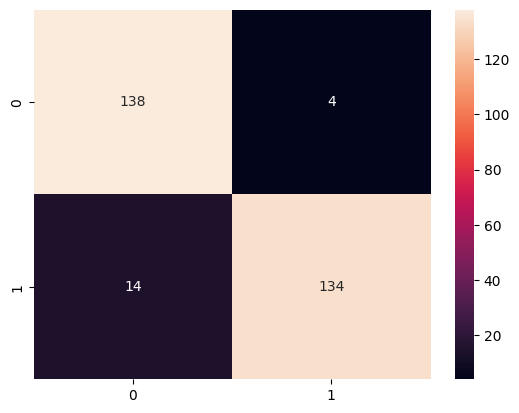

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, fmt = '', annot = True)

In [ ]:
imgs, labels = next(iter(img_generator_flow_valid))
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Model 3
https://github.com/Kirushikesh/Driver_Drowsiness_Detection/blob/main/DrowsinessModel.ipynb

In [ ]:
model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', input_shape = (52,52,1)),
  MaxPool2D((2, 2)),
  Conv2D(64, (3, 3), activation = 'relu'),
  MaxPool2D((2, 2)),
  Conv2D(128, (3, 3), activation = 'relu'),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dropout(0.5),
  Dense(128, activation = 'relu'),
  Dense(2,activation = 'softmax')
  ])

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lr_schedule = 0.001 # valeur par defaut, mais au cas où

model.compile(optimizer = Adam(learning_rate = lr_schedule),
              loss = CategoricalCrossentropy(),
              metrics = [CategoricalAccuracy()])

#model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, epochs=20)
fit_with_mlflow(13, 20) # 3 pour gray, 13 pour color en gray

# sauvegarde/enregitrement du model
model.save('CNN_model_3_gray.h5', overwrite = True)

2023/06/16 12:38:44 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/06/16 12:38:44 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/20
37/37 [==============================] - 7s 137ms/step - loss: 0.5571 - categorical_accuracy: 0.7014 - val_loss: 0.4105 - val_categorical_accuracy: 0.8172
Epoch 2/20
37/37 [==============================] - 6s 160ms/step - loss: 0.2976 - categorical_accuracy: 0.8907 - val_loss: 0.3700 - val_categorical_accuracy: 0.8448
Epoch 3/20
37/37 [==============================] - 5s 126ms/step - loss: 0.2466 - categorical_accuracy: 0.9002 - val_loss: 0.3385 - val_categorical_accuracy: 0.8586
Epoch 4/20
37/37 [==============================] - 6s 170ms/step - loss: 0.2282 - categorical_accuracy: 0.9208 - val_loss: 0.3323 - val_categorical_accuracy: 0.8793
Epoch 5/20
37/37 [==============================] - 5s 132ms/step - loss: 0.1825 - categorical_accuracy: 0.9329 - val_loss: 0.3098 - val_categorical_accuracy: 0.8862
Epoch 6/20
37/37 [==============================] - 5s 125ms/step - loss: 0.1489 - categorical_accuracy: 0.9372 - val_loss: 0.3019 - val_categorical_accuracy: 0.8931
Epoc

2023/06/16 12:40:58 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/06/16 12:40:58 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/06/16 12:41:05 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.10+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.10' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/06/16 12:41:13 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.

In [ ]:
model.summary()

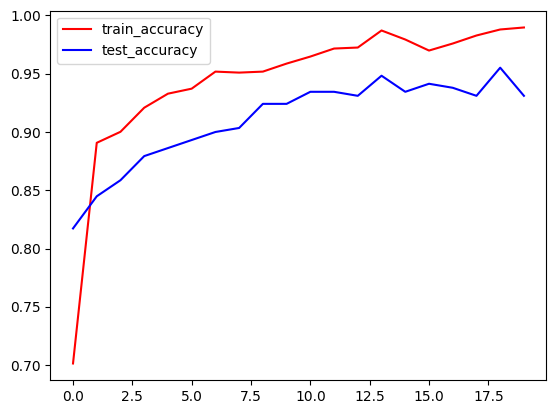

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c = "r", label = "train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c = "b", label = "test_accuracy")
plt.legend(loc = "upper left")
plt.show()

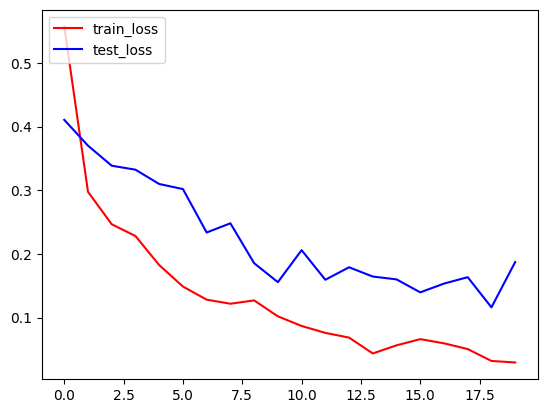

In [ ]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c = "r", label = "train_loss")
plt.plot(model.history.history["val_loss"], c = "b", label = "test_loss")
plt.legend(loc = "upper left")
plt.show()

# Model 4

In [ ]:
model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', input_shape = (52,52,1)),
  BatchNormalization(),
  MaxPool2D(pool_size = (2, 2)),
  Dropout(0.25),

  Conv2D(64, (3, 3), activation = 'relu'),
  BatchNormalization(),
  MaxPool2D(pool_size = (2, 2)),
  Dropout(0.25),

  Conv2D(128, (3, 3), activation = 'relu'),
  BatchNormalization(),
  MaxPool2D(pool_size = (2, 2)),
  Dropout(0.25),

  Flatten(),
  Dense(512, activation = 'relu'),
  BatchNormalization(),
  Dropout(0.5),
  Dense(2, activation = 'softmax')
  ])

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lr_schedule = 0.001 # valeur par defaut, mais au cas où

model.compile(optimizer = Adam(learning_rate = lr_schedule),
              loss = CategoricalCrossentropy(),
              metrics = [CategoricalAccuracy()])

#model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, epochs=20)
fit_with_mlflow(14, 20) # 4 pour gray, 14 pour color en gray

# sauvegarde/enregitrement du model
model.save('CNN_model_4_gray.h5', overwrite = True)

2023/06/16 12:43:06 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/06/16 12:43:06 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/20
37/37 [==============================] - 9s 137ms/step - loss: 0.5182 - categorical_accuracy: 0.8503 - val_loss: 1.3832 - val_categorical_accuracy: 0.5000
Epoch 2/20
37/37 [==============================] - 7s 195ms/step - loss: 0.2856 - categorical_accuracy: 0.9028 - val_loss: 1.5561 - val_categorical_accuracy: 0.5000
Epoch 3/20
37/37 [==============================] - 5s 129ms/step - loss: 0.2439 - categorical_accuracy: 0.9200 - val_loss: 1.3204 - val_categorical_accuracy: 0.5000
Epoch 4/20
37/37 [==============================] - 5s 129ms/step - loss: 0.2494 - categorical_accuracy: 0.9122 - val_loss: 0.5672 - val_categorical_accuracy: 0.7207
Epoch 5/20
37/37 [==============================] - 6s 150ms/step - loss: 0.1571 - categorical_accuracy: 0.9415 - val_loss: 0.6088 - val_categorical_accuracy: 0.6724
Epoch 6/20
37/37 [==============================] - 5s 130ms/step - loss: 0.2024 - categorical_accuracy: 0.9303 - val_loss: 0.5977 - val_categorical_accuracy: 0.6828
Epoc

2023/06/16 12:45:03 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/06/16 12:45:03 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/06/16 12:45:13 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.10+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.10' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/06/16 12:45:21 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.

In [ ]:
model.summary()

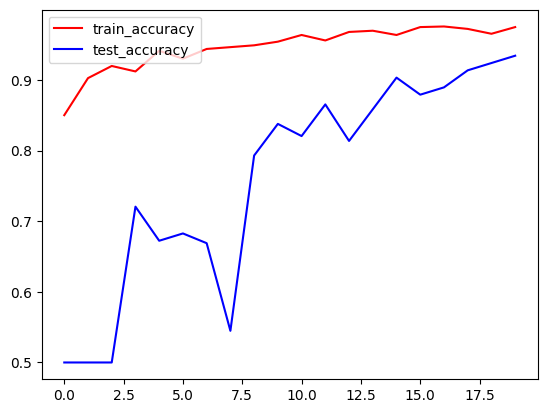

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c = "r", label = "train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c = "b", label = "test_accuracy")
plt.legend(loc = "upper left")
plt.show()

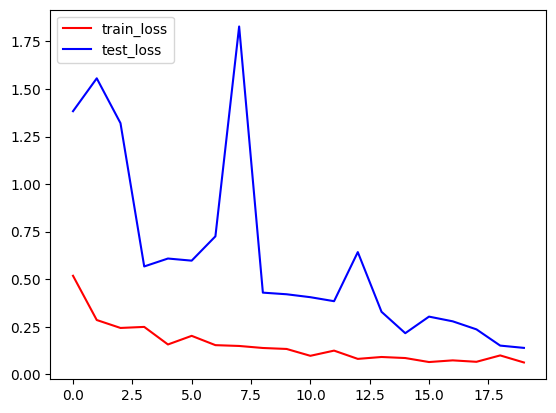

In [ ]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c = "r", label = "train_loss")
plt.plot(model.history.history["val_loss"], c = "b", label = "test_loss")
plt.legend(loc = "upper left")
plt.show()

## Verification sur des données compètements inconnues

1/1 [==============================] - 0s 83ms/step


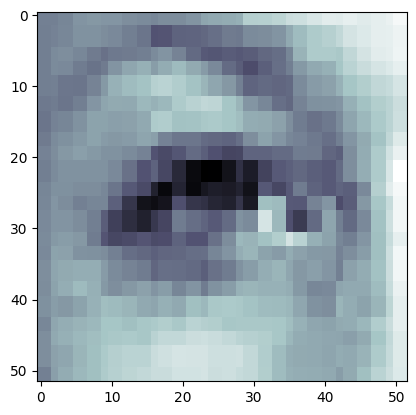

/content/zyeux/left_eye_2.jpg - classé : Open
1/1 [==============================] - 0s 20ms/step


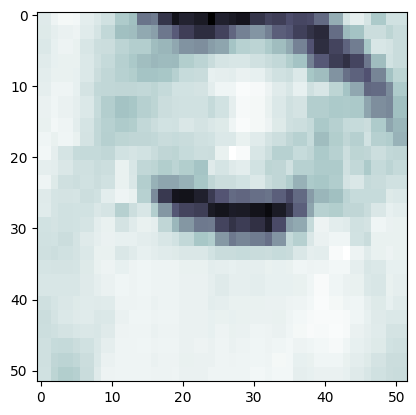

/content/zyeux/right_eye_6.jpg - classé : Closed
1/1 [==============================] - 0s 21ms/step


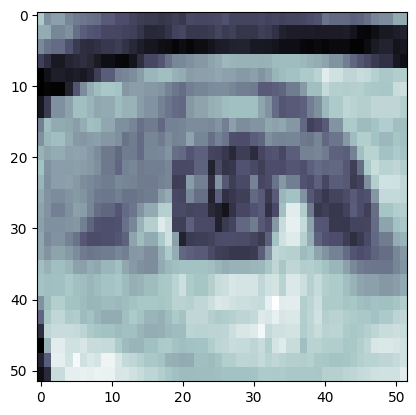

/content/zyeux/right_eye_1.jpg - classé : Open
1/1 [==============================] - 0s 20ms/step


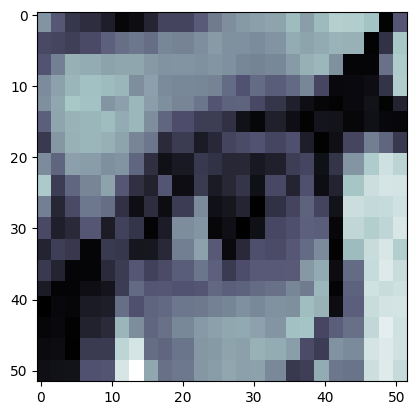

/content/zyeux/left_eye_3.jpg - classé : Open
1/1 [==============================] - 0s 36ms/step


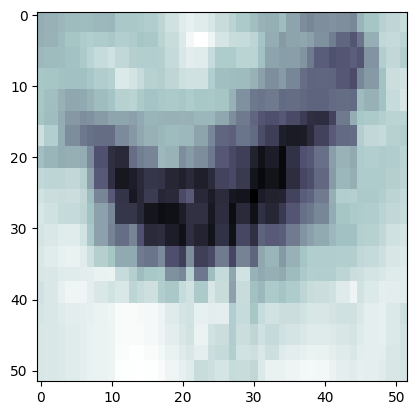

/content/zyeux/left_eye_7.jpg - classé : Closed
1/1 [==============================] - 0s 98ms/step


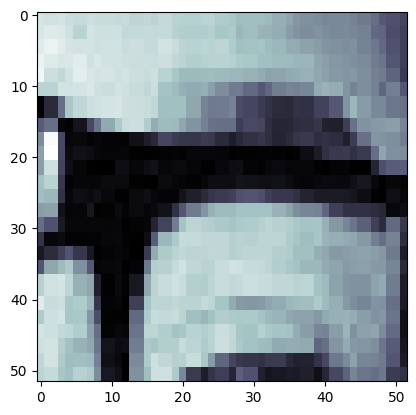

/content/zyeux/right_eye_5.jpg - classé : Closed
1/1 [==============================] - 0s 35ms/step


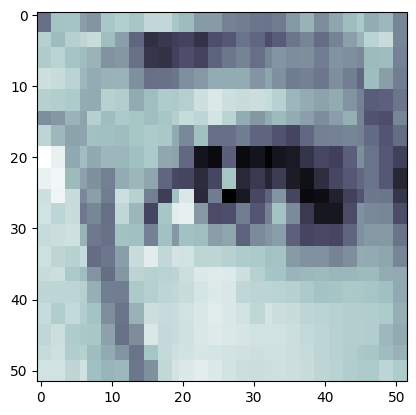

/content/zyeux/right_eye_4.jpg - classé : Open
1/1 [==============================] - 0s 20ms/step


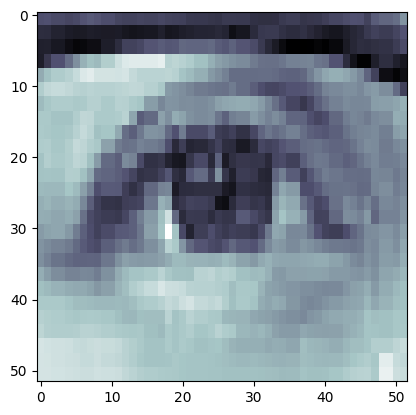

/content/zyeux/left_eye_1.jpg - classé : Open
1/1 [==============================] - 0s 19ms/step


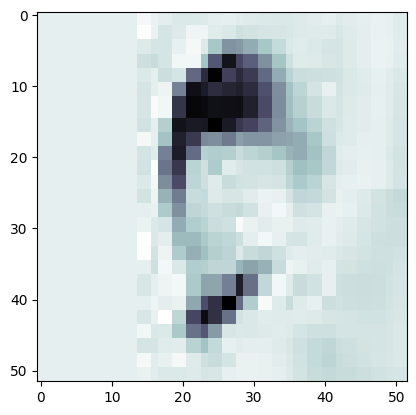

/content/zyeux/left_eye_6.jpg - classé : Open
1/1 [==============================] - 0s 19ms/step


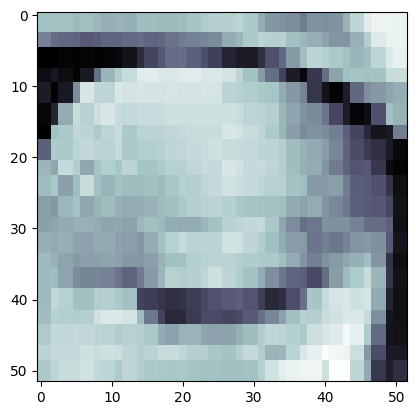

/content/zyeux/left_eye_8.jpg - classé : Closed
1/1 [==============================] - 0s 21ms/step


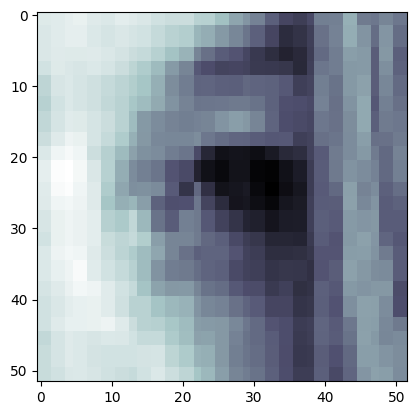

/content/zyeux/right_eye_2.jpg - classé : Open
1/1 [==============================] - 0s 18ms/step


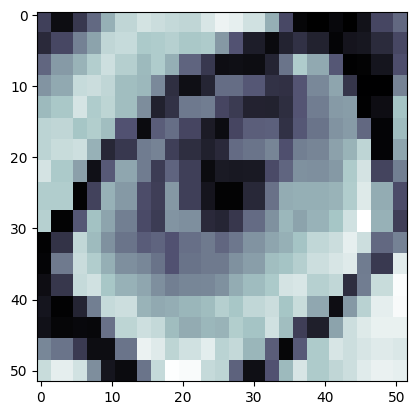

/content/zyeux/right_eye_3.jpg - classé : Open
1/1 [==============================] - 0s 25ms/step


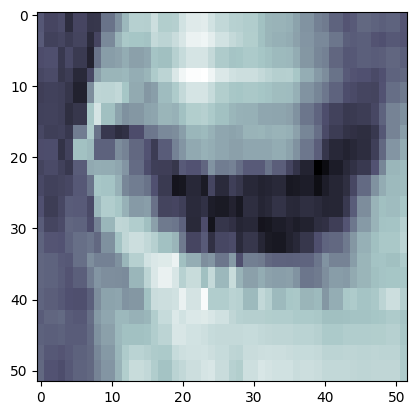

/content/zyeux/right_eye_7.jpg - classé : Closed
1/1 [==============================] - 0s 18ms/step


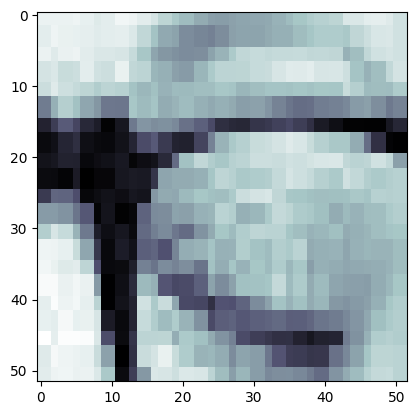

/content/zyeux/right_eye_8.jpg - classé : Closed
1/1 [==============================] - 0s 22ms/step


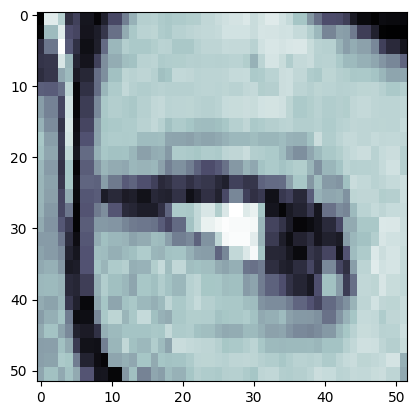

/content/zyeux/left_eye_5.jpg - classé : Closed
1/1 [==============================] - 0s 21ms/step


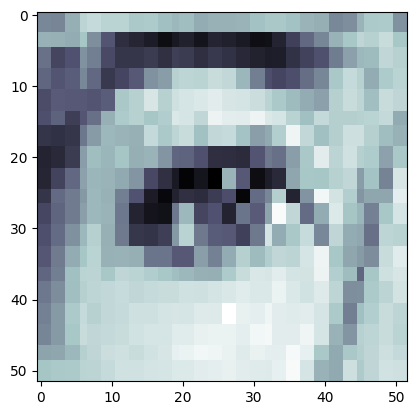

/content/zyeux/left_eye_4.jpg - classé : Open


In [ ]:
from tensorflow.keras.preprocessing import image

# load model
model_test = load_model('CNN_model_2_gray.h5')

# assign directory
imgs_path = 'data/predict/'

# iterate over files in
# that directory
for img in os.listdir(imgs_path):
    f = os.path.join(imgs_path, img)
    # checking if it is a file
    if os.path.isfile(f):
        img_path = f
        img = image.load_img(f, target_size = (52, 52), color_mode = 'grayscale')
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        x = x/255.
        preds = model_test.predict(x)
        # create a list containing the class labels
  #      class_labels = ["Closed", "Open"] # déjà calculé au début
        # find the index of the class with maximum score
        pred = np.argmax(preds, axis = -1)
        plt.imshow(img, cmap = "bone")
        plt.show()
        # print the label of the class with maximum score
#      print(class_labels[pred[0]])
        print(f"{f} - classé : {class_labels[pred[0]]}")
